In [1]:
!pip install keras

In [1]:
import keras
import numpy as np

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Conv2D, MaxPool2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [5]:
print (X_train.shape)
print (X_train[667][20])


(60000, 28, 28)
[  0   0   0   0   0 128 255 255 255 255 255 255 255 255 191 128   0   0
   0   0   0   0   0   0   0   0   0   0]


(60000, 28, 28)


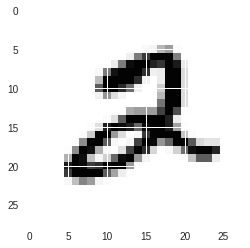

In [6]:
print (X_train.shape)
plt.imshow(X_train[5])

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print (X_train.shape)
print (X_train[667][20])

(60000, 28, 28, 1)
[[  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [128]
 [255]
 [255]
 [255]
 [255]
 [255]
 [255]
 [255]
 [255]
 [191]
 [128]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]]


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [17]:
print (X_train[667][20])

[[0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.5019608]
 [1.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [0.7490196]
 [0.5019608]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]]


In [8]:
print (y_train[30])
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print (Y_train.shape)
print (Y_train[30])

3
(60000, 10)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape = (28, 28, 1) ))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(10, (1, 1), activation='relu'))
model.add(Conv2D(10, (13, 13)))
model.add(Flatten())
model.add(Dense(units=10, activation='softmax')) #model.add(Activation('softmax')) #Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 10)        16910     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                19610     
Total params: 37,170
Trainable params: 37,170
Non-trainable params: 0
_________________________________________________________________


In [19]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape = (28, 28, 1) ))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation= 'relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(10, (1, 1), activation='relu'))
model.add(Conv2D(10, (5, 5)))
model.add(Flatten())
model.add(Dense(units=10, activation='softmax')) #model.add(Activation('softmax')) #Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 5, 5, 10)          330       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 1, 1, 10)          2510      
_________________________________________________________________
flatten_4 (Flatten)          (None, 10)                0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [23]:
model.fit(x=X_train, y=Y_train, batch_size = 32, epochs = 10)
#model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 19s 316us/step - loss: 0.0322 - acc: 0.9895
Epoch 2/10
56544/60000 [===========================>..] - ETA: 1s - loss: 0.0287 - acc: 0.9905

60000/60000 [==============================] - 19s 323us/step - loss: 0.0289 - acc: 0.9904
Epoch 3/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.0269 - acc: 0.9910
Epoch 4/10
18400/60000 [========>.....................] - ETA: 13s - loss: 0.0229 - acc: 0.9929

60000/60000 [==============================] - 19s 320us/step - loss: 0.0270 - acc: 0.9911
Epoch 5/10
60000/60000 [==============================] - 19s 321us/step - loss: 0.0247 - acc: 0.9919
Epoch 6/10
 7104/60000 [==>...........................] - ETA: 16s - loss: 0.0166 - acc: 0.9938

60000/60000 [==============================] - 19s 322us/step - loss: 0.0231 - acc: 0.9924
Epoch 7/10
60000/60000 [==============================] - 19s 320us/step - loss: 0.0235 - acc: 0.9920
Epoch 8/10
 3840/60000 [>.............................] - ETA: 18s - loss: 0.0132 - acc: 0.9948

60000/60000 [==============================] - 19s 321us/step - loss: 0.0226 - acc: 0.9924
Epoch 9/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.0203 - acc: 0.9933
Epoch 10/10
 2656/60000 [>.............................] - ETA: 18s - loss: 0.0118 - acc: 0.9955

60000/60000 [==============================] - 19s 321us/step - loss: 0.0200 - acc: 0.9934


In [24]:
score = model.evaluate(X_test, Y_test)
print (score)

10000/10000 [==============================] - 1s 102us/step
[0.05593237020008292, 0.986]


In [30]:
# manual test
y_pred = model.predict(X_test)
print(np.argmax(y_pred[:9], axis = 1))
print(y_test[:9])

[7 2 1 0 4 1 4 9 5]
[7 2 1 0 4 1 4 9 5]
